In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [28]:
path = '../../data/clean/s2_data.csv'
df = pd.read_csv(path)

category_cols = ['dose', 'screen_sex', 'project', 'week', 'menthol_status', 'strength', 'site']
df[category_cols] = df[category_cols].astype('category')

In [29]:
df

,screen_id,screen_age,screen_sex,project,week,dose,menthol_status,baseline_cpd,experimental_cpd,adherence,usual_brand,strength,carmine,carmine_nicotine,site
0,J-A001,29,Female,project 1,week0,2.4,Non-Menthol,16.142857,0.000000,NaN,Reservation Rollies Regular,regular,NaN,NaN,uvm
1,J-A001,29,Female,project 1,week01,2.4,Non-Menthol,16.142857,20.142857,1.0,Reservation Rollies Regular,regular,NaN,NaN,uvm
2,J-A001,29,Female,project 1,week02,2.4,Non-Menthol,16.142857,17.857143,1.0,Reservation Rollies Regular,regular,NaN,NaN,uvm
3,J-A001,29,Female,project 1,week03,2.4,Non-Menthol,16.142857,13.666667,1.0,Reservation Rollies Regular,regular,NaN,NaN,uvm
4,J-A001,29,Female,project 1,week04,2.4,Non-Menthol,16.142857,18.333333,1.0,Reservation Rollies Regular,regular,NaN,NaN,uvm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9052,J-C165,34,Female,project 1,week08,2.4,Menthol,19.285714,20.833333,1.0,NaN,NaN,NaN,NaN,jhu
9053,J-C165,34,Female,project 1,week09,2.4,Menthol,19.285714,20.000000,1.0,NaN,NaN,NaN,NaN,jhu
9054,J-C165,34,Female,project 1,week10,2.4,Menthol,19.285714,20.000000,1.0,NaN,NaN,NaN,NaN,jhu
9055,J-C165,34,Female,project 1,week11,2.4,Menthol,19.285714,20.000000,1.0,NaN,NaN,NaN,NaN,jhu


Categorical

In [30]:
df.describe(include=['category'])

,screen_sex,project,week,dose,menthol_status,strength,site
count,9057,9057,9057,9057.0,9057,8979,9057
unique,2,3,13,3.0,2,4,3
top,Female,project 2,week0,0.4,Non-Menthol,regular,uvm
freq,6472,3077,775,3260.0,4998,7170,6010


Continuous

In [31]:
df.describe()

,screen_age,baseline_cpd,experimental_cpd,adherence,carmine_nicotine
count,9057.000000,9057.000000,9057.000000,8162.000000,7437.000000
mean,36.065805,19.786914,19.069471,0.894110,17.597916
std,11.108000,10.613120,15.064543,0.200769,2.091094
min,18.000000,0.000000,0.000000,0.000000,13.200000
25%,27.000000,11.666667,8.142857,0.889772,16.100000
50%,34.000000,18.571429,17.000000,0.993311,17.300000
75%,43.000000,24.714286,26.142857,1.000000,18.900000
max,68.000000,71.285714,113.142857,1.000000,29.300000


Now, this is longitudinal data that I cleaned in various different ways. Baseline characteristics like sex at birth, age at screening, baseline cigarettes per day, study population (project), study site, experimental dose, menthol status, and usual brand preference are all __permenant__ throughout the trial. I _completed_ the data frame with these values throughout each subject's experimental week entry (`week1` through `week12`) with the values in that subject's `week0` entry. 

## Outcome variables of interest
### Cigarettes Per Day (CPD)

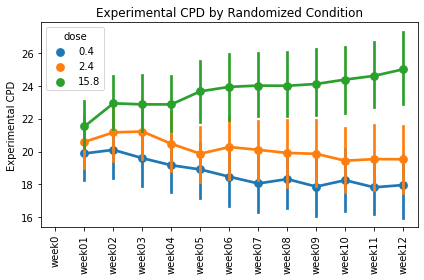

In [49]:
f, ax = plt.subplots()
sns.pointplot(
    x = 'week',
    y = 'experimental_cpd',
    hue = 'dose',
    data = df[df['week'] != 'week0']
    
)
plt.xticks(rotation = 90)
plt.xlabel(None)
plt.ylabel('Experimental CPD')
plt.title("Experimental CPD by Randomized Condition")
plt.tight_layout()

plt.savefig("../../figures/cpd_by_week.png", dpi = 200, transparent = False)
plt.show()


### Adherence